In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random

plt.style.use('ggplot')

In [3]:
with open('results/all_results.pkl', 'rb') as file:
    results = pickle.load(file)

print("Results keys:", results.keys())
single_shot_results = results['single_shot']
ar_results = results['auto_regressive']

# Check dimensions
print("Single-shot Results dimensions:", [np.array(x).shape for x in single_shot_results])
print("Auto-regressive Results dimensions:", [np.array(x).shape for x in ar_results])

Results keys: dict_keys(['single_shot', 'auto_regressive'])
Single-shot Results dimensions: [(), (), (), (), (26, 2, 10, 13), (26, 10, 26), (26, 10, 26)]
Auto-regressive Results dimensions: [(), (), (), (), (26, 2, 10, 13), (26, 2, 10, 13), (26, 2, 10, 13)]


In [4]:
def separate_data(data, feature_index=0):
    # Convert to numpy array if not already
    data = np.array(data)
    
    # Assuming the second dimension (index 1) represents the feature (temperature, GHG)
    temperature_data = data[:, feature_index, :, :]

    ghg_data = data[:, 1 - feature_index, :, :]  # Assuming there are only two features
    return temperature_data, ghg_data


In [5]:
# Parse the data for single-shot model
ss_inputs, ss_predictions, ss_targets = results['single_shot'][4], results['single_shot'][5], results['single_shot'][6]
ss_input_temp, ss_input_ghg = separate_data(ss_inputs)

# Convert lists to numpy arrays
ss_inputs = np.array(results['single_shot'][4])
ss_predictions = np.array(results['single_shot'][5])
ss_targets = np.array(results['single_shot'][6])

# Separate the data
ss_input_temp, ss_input_ghg = separate_data(ss_inputs)
ss_pred_temp = ss_predictions[:, :, :13]  # Assuming first 13 features are temperature
ss_pred_ghg = ss_predictions[:, :, 13:]   # Assuming next 13 features are GHG emissions
ss_target_temp = ss_targets[:, :, :13]
ss_target_ghg = ss_targets[:, :, 13:]

# Check the dimensions to ensure everything is correct
print("ss_input_temp shape:", ss_input_temp.shape)
print("ss_input_ghg shape:", ss_input_ghg.shape)
print("ss_pred_temp shape:", ss_pred_temp.shape)
print("ss_pred_ghg shape:", ss_pred_ghg.shape)
print("ss_target_temp shape:", ss_target_temp.shape)
print("ss_target_ghg shape:", ss_target_ghg.shape)

ss_input_temp shape: (26, 10, 13)
ss_input_ghg shape: (26, 10, 13)
ss_pred_temp shape: (26, 10, 13)
ss_pred_ghg shape: (26, 10, 13)
ss_target_temp shape: (26, 10, 13)
ss_target_ghg shape: (26, 10, 13)


In [6]:
# Parse the data for the autoregressive model
ar_inputs, ar_predictions, ar_targets = results['auto_regressive'][4], results['auto_regressive'][5], results['auto_regressive'][6]
ar_input_temp, ar_input_ghg = separate_data(ar_inputs)

# Assuming the structure of AR predictions is similar to that of AR inputs
ar_pred_temp, ar_pred_ghg = separate_data(ar_predictions)


# Check the dimensions to ensure everything is correct
print("ar_input_temp shape:", ar_input_temp.shape)
print("ar_input_ghg shape:", ar_input_ghg.shape)
print("ar_pred_temp shape:", ar_pred_temp.shape)
print("ar_pred_ghg shape:", ar_pred_ghg.shape)


ar_input_temp shape: (26, 10, 13)
ar_input_ghg shape: (26, 10, 13)
ar_pred_temp shape: (26, 10, 13)
ar_pred_ghg shape: (26, 10, 13)


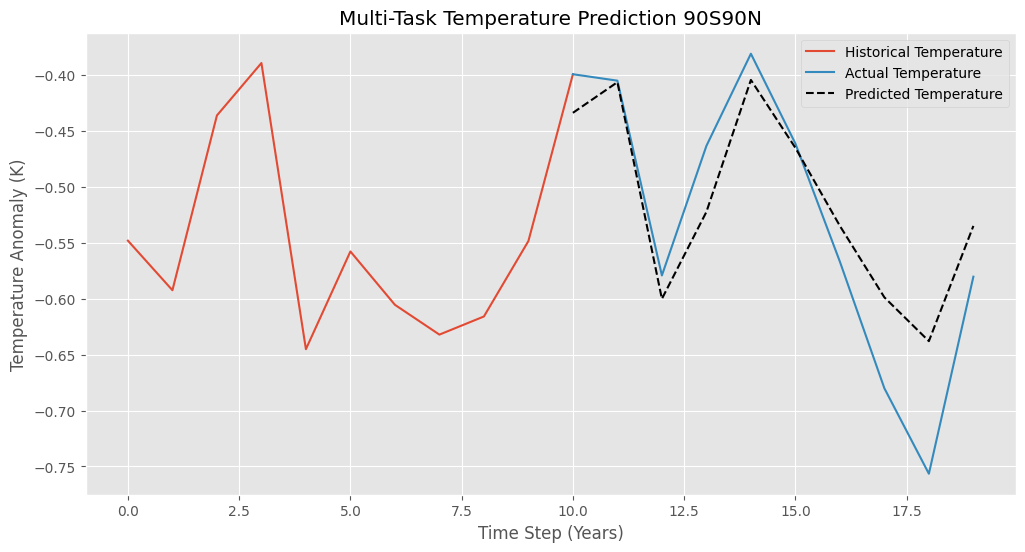

In [8]:
# Set the figure size and style for better clarity and appearance
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')  # Use the 'ggplot' style for a cleaner and more aesthetically pleasing look

# Select a specific sample or location
sample_index = 4
location_index = 1  # Assuming you want to plot for the first location as an example

# Extract data for the selected sample and location
input_sample = ss_input_temp[sample_index, :, location_index]
prediction_sample = ss_pred_temp[sample_index, :, location_index]
target_sample = ss_target_temp[sample_index, :, location_index]

# Define time axes for input, prediction, and target data
time_axis_input = np.arange(len(input_sample))
time_axis_future = np.arange(time_axis_input[-1] + 1, time_axis_input[-1] + 1 + len(target_sample))

# Extend the input time axis and sample to include the first future point for a seamless transition
extended_time_axis_input = np.append(time_axis_input, time_axis_future[0])
extended_input_sample = np.append(input_sample, target_sample[0])

# Plotting
plt.plot(extended_time_axis_input, extended_input_sample, label='Historical Temperature', zorder=1)
plt.plot(time_axis_future, target_sample, label='Actual Temperature', zorder=2)
plt.plot(time_axis_future, prediction_sample, label='Predicted Temperature', linestyle='--', zorder=3, color="black")

# Customize the plot
plt.title('Multi-Task Temperature Prediction 90S90N')
plt.xlabel('Time Step (Years)')
plt.ylabel('Temperature Anomaly (K)')
plt.legend()

# Save the figure if needed
plt.savefig('figures/Multi-Task Prediction (3).jpg', format='jpg', dpi=300)

# Show the plot

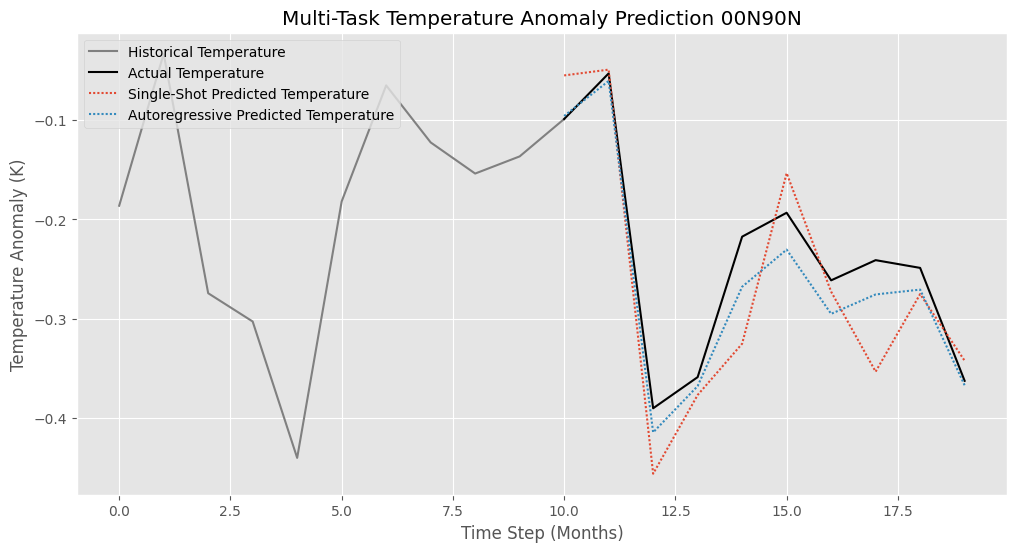

In [47]:

def plot_model_comparisons(ss_inputs, ss_predictions, ss_targets, ar_predictions, title, figname, sample_index=11, location_index=0):
    plt.figure(figsize=(12, 6))
    plt.style.use('ggplot')

    # Extract data for the selected sample and location
    input_sample = ss_inputs[sample_index, :, location_index]
    ss_prediction_sample = ss_predictions[sample_index, :, location_index]
    ar_prediction_sample = ar_predictions[sample_index, :, location_index]
    target_sample = ss_targets[sample_index, :, location_index]

    # Define time axes
    time_axis_input = np.arange(len(input_sample))
    time_axis_future = np.arange(time_axis_input[-1] + 1, time_axis_input[-1] + 1 + len(target_sample))

    # Extend the input time axis to match the length of the extended input sample
    extended_time_axis_input = np.arange(len(input_sample) + 1)  # +1 to include the first point of the actual temperature

    # Extend the input sample by appending the first point of the target sample for a seamless transition
    extended_input_sample = np.append(input_sample, target_sample[0])

    # Plotting
    plt.plot(extended_time_axis_input, extended_input_sample, label='Historical Temperature', zorder=1, color = "grey")
    plt.plot(time_axis_future, target_sample, label='Actual Temperature', zorder=2, color="black")
    plt.plot(time_axis_future, ss_prediction_sample, label='Single-Shot Predicted Temperature', linestyle=(0, (1, 1)), zorder=3)
    plt.plot(time_axis_future, ar_prediction_sample, label='Autoregressive Predicted Temperature', linestyle=(0, (1, 1)), zorder=4)

    # Customize the plot
    plt.title(title)
    plt.xlabel('Time Step (Months)')
    plt.ylabel('Temperature Anomaly (K)')
    plt.legend(loc='upper left')

    plt.savefig(f'figures/{figname}.jpg', format='jpg', dpi=300)
    plt.show()

# Assuming you have the 'ar_predictions' array for the autoregressive model predictions
# ar_predictions = np.array(ar_results[5])  # Example to obtain AR predictions; adjust as per your data structure

# Now call the function with the provided data
plot_model_comparisons(ss_input_temp, ss_pred_temp, ss_target_temp, ar_pred_temp, 'Multi-Task Temperature Anomaly Prediction 00N90N', 'Multi-Task Temperature Anomaly Prediction 00N90N', location_index=0)
